<a href="https://colab.research.google.com/github/LRisaro/TP_DATOS_2021/blob/main/TP_DATOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ojo con borrar registros solamente porque hay pocos de un mismo tipo. Pueden igualmente afectar la predicción aunque sean pocos. Vuelvan a incorporarlos y súmenlos al análisis para ver cómo se comportan.**

**Apliquen el log en el eje Y solamente a las variables que de otra manera no se podrían graficar exitosamente, ya que nubla un poco el entendimiento del gráfico. Otras formas posibles de lidiar con distintas magnitudes de cantidades es graficar el porcentaje en vez de cantidades.**

**Bien aclarando sus suposiciones sobre los valores 0 de ganancia y pérdida de la bolsa. Sé que se las marqué en la defensa pero las agregaron bien al final así que perdón por la confusión. Como charlamos, siempre está bueno aclarar las suposiciones que hacen para cuando lo lea la gente de producto.**

* Hay varias columnas que las analizan numéricamente nomás. Agreguen gráficos de estos análisis para facilitar la lectura y que a simple vista pueda notarse la distribución de estas variables. También sumen un análisis de lo que ven en el gráfico. Algunos ejemplos son: edad, horas de trabajo, barrio.

* Antes de unificar variables chequeen si está unión es válida, mostrando que las dos variables se comportan de manera similar y por eso pueden unirse sin problema. Esto se aplica a matrimonio civil y militar y casado y casada. 

* En el segmento de Relacion entre Columnas, apliquen el formato de pregunta análisis y respuestas, mostrando qué es lo que ven los heatmaps y por qué creen que son los gráficos que más influencian la función baseline que hicieron. ¿Qué pasó con las conclusiones que observaron antes, como por ejemplo el hecho de si operaba en la bolsa o no? ¿Por qué no las terminaron incluyendo en el baseline?

**Recuerden que por convención las funciones en Python se comienzan en minúscula, ya que las clases suelen escribirse con mayúscula.**

**Modifiquen el baseline removiendo el for y reemplazándolo por un apply o por el uso de filtros o máscaras binarias que aplican sobre el dataset. Recuerden no usar números mágicos en lo posible, para acceder a una columna es más claro llamarla por su nombre, por ejemplo row.genero.**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sbn
from sklearn import tree
from sklearn.metrics import accuracy_score

%matplotlib inline

plt.style.use('default') 

sbn.set(style="whitegrid") 

In [ ]:
def getData():
  return pd.read_csv("https://docs.google.com/spreadsheets/d/1-DWTP8uwVS-dZY402-dm0F9ICw_6PNqDGLmH0u8Eqa0/export?format=csv&gid=2054774482")

# **Inspección inicial del dataset**

In [ ]:
# Obtengo el set de datos en un dataframe
df = getData()
df.columns

Index(['anios_estudiados', 'barrio', 'categoria_de_trabajo', 'edad',
       'educacion_alcanzada', 'estado_marital',
       'ganancia_perdida_declarada_bolsa_argentina', 'genero',
       'horas_trabajo_registradas', 'religion', 'rol_familiar_registrado',
       'tiene_alto_valor_adquisitivo', 'trabajo'],
      dtype='object')

In [ ]:
# Inspeccionamos las dimensiones iniciales del dataframe
df.shape

(32561, 13)

In [ ]:
# Verifico que "tiene_alto_valor_adquisitivo" no tenga valores nulos
df['tiene_alto_valor_adquisitivo'].isnull().any()

False

In [ ]:
# Verificamos si hay campos con valores nulos
df.isnull().sum()

anios_estudiados                                 0
barrio                                         583
categoria_de_trabajo                          1836
edad                                             0
educacion_alcanzada                              0
estado_marital                                   0
ganancia_perdida_declarada_bolsa_argentina       0
genero                                           0
horas_trabajo_registradas                        0
religion                                         0
rol_familiar_registrado                          0
tiene_alto_valor_adquisitivo                     0
trabajo                                       1843
dtype: int64

In [ ]:
df.head()

,anios_estudiados,barrio,categoria_de_trabajo,edad,educacion_alcanzada,estado_marital,ganancia_perdida_declarada_bolsa_argentina,genero,horas_trabajo_registradas,religion,rol_familiar_registrado,tiene_alto_valor_adquisitivo,trabajo
0,17,Palermo,empleado_provincial,39,universidad_3_anio,sin_matrimonio,2174,hombre,40,cristianismo,sin_familia,0,entretenimiento
1,17,Palermo,monotibutista,50,universidad_3_anio,matrimonio_civil,0,hombre,13,cristianismo,casado,0,directivo_gerente
2,13,Palermo,relacion_de_dependencia,38,4_anio,divorciado,0,hombre,40,cristianismo,sin_familia,0,limpiador
3,11,Palermo,relacion_de_dependencia,53,2_anio,matrimonio_civil,0,hombre,40,judaismo,casado,0,limpiador
4,17,Balvanera,relacion_de_dependencia,28,universidad_3_anio,matrimonio_civil,0,mujer,40,judaismo,casada,0,profesional_especializado


# **Análisis de columnas**

## **Años estudiados**

**Preguntas:**

* ¿La columna aporta información relevante?
* ¿El dato esta completo en todas las filas?
* ¿Aporta valor para realizar una predicción?

**Análisis**

In [ ]:
# ¿Tiene valores nulos?
df["anios_estudiados"].isnull().sum()

0

In [ ]:
df["anios_estudiados"].value_counts()

13    10501
14     7291
17     5355
18     1723
15     1382
11     1175
16     1067
10      933
8       646
19      576
9       514
12      433
20      413
6       333
4       168
1        51
Name: anios_estudiados, dtype: int64

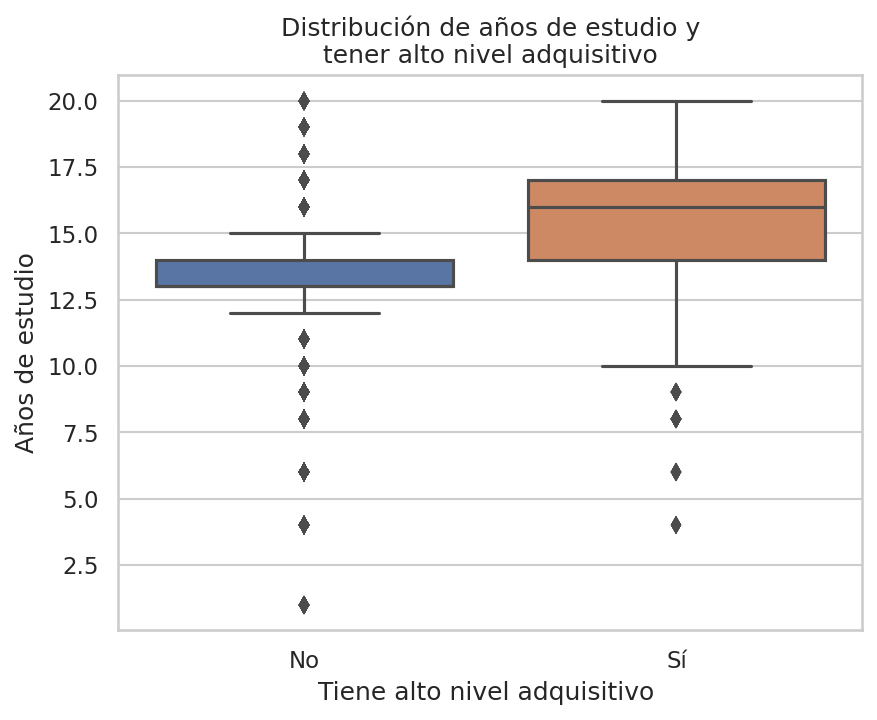

In [ ]:
plt.figure(dpi=150)
plt.title("Distribución de años de estudio y\n tener alto nivel adquisitivo ")
sbn.boxplot(
    data=df,
    y='anios_estudiados',
    x='tiene_alto_valor_adquisitivo'
)
plt.ylabel("Años de estudio")
plt.xlabel("Tiene alto nivel adquisitivo ")
plt.xticks([False, True], ["No", "Sí"])
plt.show()

**Conclusiones**

Podemos observar que esta columna no tiene registros faltantes. 

Al analizar la distribución de años de estudio vemos que los que tiene entre 14 y 17 aproxidamente tienen un alto nivel adquisitivo.

## **Categoria de trabajo**

**Preguntas:**

* ¿La columna aporta información relevante?
* ¿El dato esta completo en todas las filas?
* ¿Aporta valor para realizar una predicción?

**Análisis**


In [ ]:
# ¿Tiene valores nulos?
df["categoria_de_trabajo"].isnull().sum()

1836

In [ ]:
df["categoria_de_trabajo"].value_counts()

relacion_de_dependencia    22696
monotibutista               2541
empleado_municipal          2093
empleado_provincial         1298
responsable_inscripto       1116
empleadao_estatal            960
trabajo_voluntariado          14
sin_trabajo                    7
Name: categoria_de_trabajo, dtype: int64

In [ ]:
# Analizamos categoria sin_trabajo
df_categoria_sin_trabajo = df[df["categoria_de_trabajo"] == "sin_trabajo"]
df_categoria_sin_trabajo["tiene_alto_valor_adquisitivo"].value_counts()

0    7
Name: tiene_alto_valor_adquisitivo, dtype: int64

In [ ]:
# Analizamos categoria trabajo_voluntariado
df_categoria_trabajo_voluntariado = df[df["categoria_de_trabajo"] == "trabajo_voluntariado"]
df_categoria_trabajo_voluntariado["tiene_alto_valor_adquisitivo"].value_counts()

0    14
Name: tiene_alto_valor_adquisitivo, dtype: int64

In [ ]:
# Analizamos categoria relacion de dependencia
df_categoria_trabajo_dependiente = df[df["categoria_de_trabajo"] == "relacion_de_dependencia"]
df_categoria_trabajo_dependiente["tiene_alto_valor_adquisitivo"].value_counts()

0    17733
1     4963
Name: tiene_alto_valor_adquisitivo, dtype: int64

In [ ]:
# Analizamos categoria monotibutista
df_categoria_trabajo_monotributista = df[df["categoria_de_trabajo"] == "monotibutista"]
df_categoria_trabajo_monotributista["tiene_alto_valor_adquisitivo"].value_counts()

0    1817
1     724
Name: tiene_alto_valor_adquisitivo, dtype: int64

In [ ]:
# Analizamos categoria empleado municipal          
df_categoria_trabajo_municipal = df[df["categoria_de_trabajo"] == "empleado_municipal"]
df_categoria_trabajo_municipal["tiene_alto_valor_adquisitivo"].value_counts()

0    1476
1     617
Name: tiene_alto_valor_adquisitivo, dtype: int64

In [ ]:
# Analizamos categoria empleado provincial
df_categoria_trabajo_provincial = df[df["categoria_de_trabajo"] == "empleado_provincial"]
df_categoria_trabajo_provincial["tiene_alto_valor_adquisitivo"].value_counts()

0    945
1    353
Name: tiene_alto_valor_adquisitivo, dtype: int64

In [ ]:
# Analizamos por categoria responsable inscripto
df_categoria_trabajo_responsable_inscripto = df[df["categoria_de_trabajo"] == "responsable_inscripto"]
df_categoria_trabajo_responsable_inscripto["tiene_alto_valor_adquisitivo"].value_counts()

1    622
0    494
Name: tiene_alto_valor_adquisitivo, dtype: int64

In [ ]:
# Analizamos por categoria empleado estatal            
df_categoria_trabajo_estatal = df[df["categoria_de_trabajo"] == "empleadao_estatal"]
df_categoria_trabajo_estatal["tiene_alto_valor_adquisitivo"].value_counts()

0    589
1    371
Name: tiene_alto_valor_adquisitivo, dtype: int64

<Figure size 960x720 with 0 Axes>

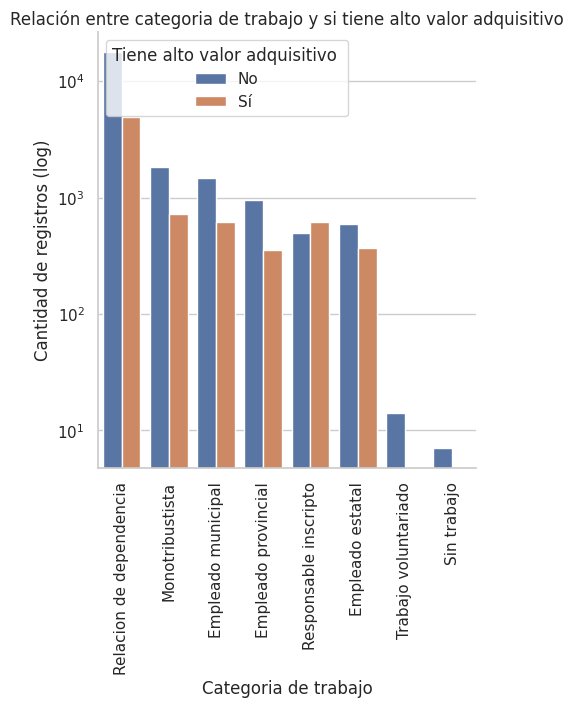

In [ ]:
# Comparamos la categoria de trabajo y si tiene alto valor adquisitivo
plt.figure(dpi=150)
df_aux = df[["tiene_alto_valor_adquisitivo", "categoria_de_trabajo"]].value_counts().reset_index()
df_aux.columns.values[2] = 'count'
df_aux.tiene_alto_valor_adquisitivo.replace(to_replace=[True, False], value=["Sí", "No"], inplace=True)
df_aux.categoria_de_trabajo.replace(to_replace=["relacion_de_dependencia", "monotibutista", "empleado_municipal", "empleado_provincial", "responsable_inscripto", "empleadao_estatal", "trabajo_voluntariado", "sin_trabajo"], 
    value=["Relacion de dependencia", "Monotribustista", "Empleado municipal", "Empleado provincial", "Responsable inscripto", "Empleado estatal", "Trabajo voluntariado", "Sin trabajo"], inplace=True)

sbn.catplot(data=df_aux, x='categoria_de_trabajo', y='count', hue='tiene_alto_valor_adquisitivo', kind='bar', legend=False)

plt.legend(title = "Tiene alto valor adquisitivo ")
plt.ylabel("Cantidad de registros (log)")
plt.xlabel("Categoria de trabajo")
plt.title('Relación entre categoria de trabajo y si tiene alto valor adquisitivo')
plt.xticks(rotation=90)
plt.yscale("log")
plt.show()

**Conclusiones**

Podemos observar que faltan 1632 de los 32561 valores (5,6 %). 

Podemos observar que la mayoria de los registros corresponden a valor "relacion_de_dependencia".

También observamos que la mayoria de los responzables inscriptos tienen un alto nivel adquisitivo.

## **Barrio**

**Preguntas:**

* ¿La columna aporta información relevante?
* ¿El dato esta completo en todas las filas?
* ¿Aporta valor para realizar una predicción?
* ¿Los datos estan balanceados?
* ¿Hay valores mas representativos?

**Análisis**

In [ ]:
# ¿Tiene valores nulos?
df["barrio"].isnull().sum()

583

In [ ]:
df["barrio"].value_counts()

Palermo                29170
Belgrano                 643
San Isidro               198
Villa Urquiza            137
Recoleta                 121
La Boca                  114
Agronomia                106
Almagro                  100
Balvanera                 95
Puerto Madero             90
Caballito                 81
Boedo                     80
Barracas                  75
Chacarita                 73
Coghland                  70
Floresta                  67
Constitucion              64
Colegiales                62
Flores                    60
Liniers                   59
Monte Castro              51
Mataderos                 44
Nueva Pompeya             43
Monserrat                 37
nuñez                     34
Parque Chacabuco          31
Parque Avellaneda         29
Villa Luro                29
Parque Chas               28
La Paternal               24
Retiro                    20
Villa Soldati             19
Villa Devoto              19
San Telmo                 18
Villa Real    

In [ ]:
df_barrio_alto_valor = df[df["tiene_alto_valor_adquisitivo"] == True]
df_barrio_alto_valor["barrio"].value_counts()

Palermo              7171
San Isidro             61
Villa Urquiza          44
Almagro                40
Recoleta               39
Belgrano               33
Puerto Madero          30
Balvanera              25
Chacarita              25
Colegiales             24
Monte Castro           20
Barracas               20
Nueva Pompeya          18
Boedo                  16
La Boca                12
Villa Luro             12
Flores                 12
Caballito              10
Agronomia               9
Parque Avellaneda       8
Villa Devoto            7
Santa Rita              6
Retiro                  6
Floresta                5
La Paternal             5
Parque Chas             4
Monserrat               4
Mataderos               4
Velez Sarsfield         3
Villa Pueyrredon        3
San Telmo               3
Constitucion            3
Villa Soldati           2
Villa Real              2
Parque Chacabuco        2
Coghland                2
Liniers                 2
nuñez                   2
Versalles   

In [ ]:
df_barrio_bajo_valor = df[df["tiene_alto_valor_adquisitivo"] == False]
df_barrio_bajo_valor["barrio"].value_counts()

Palermo                21999
Belgrano                 610
San Isidro               137
La Boca                  102
Agronomia                 97
Villa Urquiza             93
Recoleta                  82
Caballito                 71
Balvanera                 70
Coghland                  68
Boedo                     64
Floresta                  62
Constitucion              61
Puerto Madero             60
Almagro                   60
Liniers                   57
Barracas                  55
Chacarita                 48
Flores                    48
Mataderos                 40
Colegiales                38
Monserrat                 33
nuñez                     32
Monte Castro              31
Parque Chacabuco          29
Nueva Pompeya             25
Parque Chas               24
Parque Avellaneda         21
La Paternal               19
Villa Luro                17
Villa Soldati             17
Villa Real                16
San Telmo                 15
Retiro                    14
Villa General 

<Figure size 960x720 with 0 Axes>

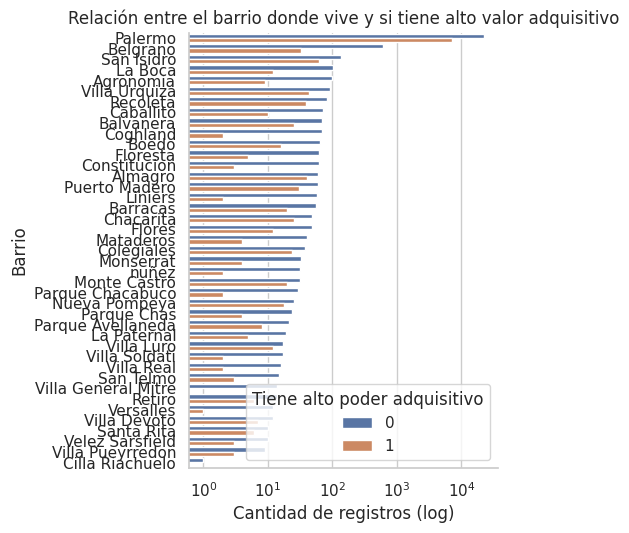

In [ ]:
plt.figure(dpi=150)
df_aux = df[["tiene_alto_valor_adquisitivo", "barrio"]].value_counts().reset_index()
df_aux.columns.values[2] = 'count'

sbn.catplot(data=df_aux, x='count', y='barrio', hue='tiene_alto_valor_adquisitivo', kind='bar', legend=False)

plt.legend(title = "Tiene alto poder adquisitivo")
plt.ylabel("Barrio")
plt.xlabel("Cantidad de registros (log)")
plt.title('Relación entre el barrio donde vive y si tiene alto valor adquisitivo')
plt.xscale("log")
plt.show()

**Conclusiones**

Podemos observar que esta columna solo tiene un faltante de 583 sobre los 32561 valores (1,8 %). 

La mayoria de los registros corresponde al barrio de Palermo.

Los datos no estan balanceados.

## **Edad**

**Preguntas:**

* ¿La columna aporta información relevante?
* ¿El dato esta completo en todas las filas?
* ¿Aporta valor para realizar una predicción?

**Análisis**

In [ ]:
# ¿Tiene valores nulos?
df["edad"].isnull().sum()

0

In [ ]:
df["edad"].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: edad, Length: 73, dtype: int64

In [ ]:
df_edad_alto_valor = df[df["tiene_alto_valor_adquisitivo"] == True]
df_edad_alto_valor["edad"].value_counts()

37    292
46    292
47    288
45    288
38    282
     ... 
81      3
80      2
19      2
83      2
84      1
Name: edad, Length: 65, dtype: int64

In [ ]:
df_edad_sin_alto_valor = df[df["tiene_alto_valor_adquisitivo"] == False]
df_edad_sin_alto_valor["edad"].value_counts()

23    865
25    788
24    767
27    754
20    753
     ... 
83      4
85      3
88      3
87      1
86      1
Name: edad, Length: 73, dtype: int64

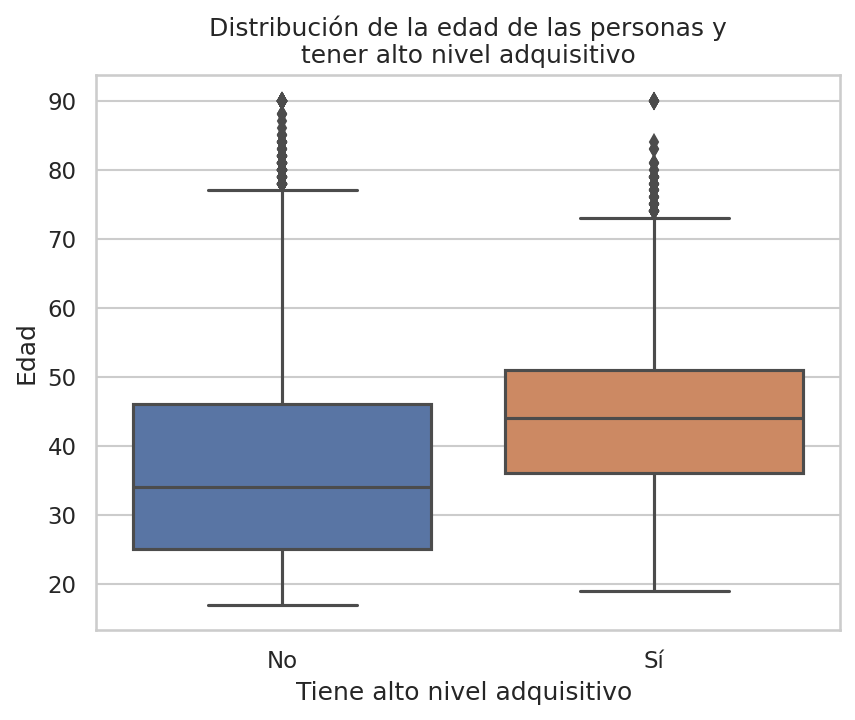

In [ ]:
plt.figure(dpi=150)
plt.title("Distribución de la edad de las personas y\n tener alto nivel adquisitivo ")
sbn.boxplot(
    data=df,
    y='edad',
    x='tiene_alto_valor_adquisitivo'
)
plt.ylabel("Edad")
plt.xlabel("Tiene alto nivel adquisitivo ")
plt.xticks([False, True], ["No", "Sí"])
plt.show()

**Conclusiones**

Podemos observar que no tiene valores nulos.

Esta columna presenta un amplio rango de valores posibles en el caso de tener alto nivel adquisitivo, no es concluyente.

## **Educación alcanzada**

**Preguntas:**

* ¿La columna aporta información relevante?
* ¿El dato esta completo en todas las filas?
* ¿Aporta valor para realizar una predicción?

**Análisis**

In [ ]:
# ¿Tiene valores nulos?
df["educacion_alcanzada"].isnull().sum()

0

In [ ]:
df["educacion_alcanzada"].value_counts()

4_anio                10501
5_anio                 7291
universidad_3_anio     5355
universidad_4_anio     1723
universidad_1_anio     1382
2_anio                 1175
universidad_2_anio     1067
1_anio                  933
7-8_grado               646
universiada_5_anio      576
9_grado                 514
3_anio                  433
universiada_6_anio      413
5-6_grado               333
1-4_grado               168
preescolar               51
Name: educacion_alcanzada, dtype: int64

In [ ]:
df.replace({"preescolar" : 1, "1-4_grado": 2, "5-6_grado": 3, "7-8_grado" : 4, "9_grado" : 5, "1_anio" : 6, "2_anio" : 7, "3_anio" : 8, "4_anio" : 9, "5_anio" : 10, "universidad_1_anio" : 11, "universidad_2_anio" : 12,
              "universidad_3_anio" : 13, "universidad_4_anio" : 14, "universiada_5_anio" : 15, "universiada_6_anio" : 16}, inplace = True)

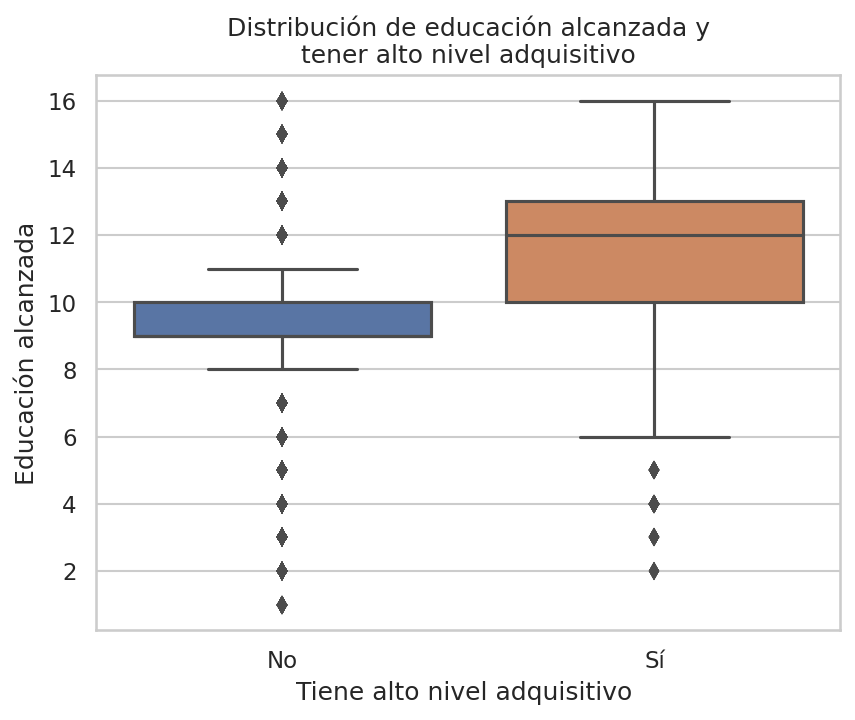

In [ ]:
plt.figure(dpi=150)
plt.title("Distribución de educación alcanzada y\n tener alto nivel adquisitivo ")
sbn.boxplot(
    data=df,
    y='educacion_alcanzada',
    x='tiene_alto_valor_adquisitivo'
)
plt.ylabel("Educación alcanzada")
plt.xlabel("Tiene alto nivel adquisitivo ")
plt.xticks([False, True], ["No", "Sí"])
plt.show()

**Conclusiones**

Podemos observar que no tiene valores nulos.

Con el fin de tener una variable con cardinalidad convertimos los valores de string a números.

Vemos que si tiene un nivel de estudio de entre 5° año de secundaria y 3° de universidad hay una mayor concentracion de población con alto nivel adquisitivo.

## **Estado marital**

**Preguntas:**

* ¿La columna aporta información relevante?
* ¿El dato esta completo en todas las filas?
* ¿Aporta valor para realizar una predicción?

**Análisis**

In [ ]:
# ¿Tiene valores nulos?
df["estado_marital"].isnull().sum()

0

In [ ]:
df["estado_marital"].value_counts()

matrimonio_civil      14976
sin_matrimonio        10683
divorciado             4443
separado               1025
viudo_a                 993
pareja_no_presente      418
matrimonio_militar       23
Name: estado_marital, dtype: int64

In [ ]:
df_estado_marital_hombre = pd.DataFrame()
df_estado_marital_hombre = df[df.genero == "hombre"].copy()

df_estado_marital_hombre["estado_marital"].value_counts()

matrimonio_civil      13319
sin_matrimonio         5916
divorciado             1771
separado                394
pareja_no_presente      213
viudo_a                 168
matrimonio_militar        9
Name: estado_marital, dtype: int64

In [ ]:
df_hombre = pd.DataFrame()
df_hombre = df_estado_marital_hombre[df_estado_marital_hombre.estado_marital == "matrimonio_militar"].copy()

df_hombre["tiene_alto_valor_adquisitivo"].value_counts()

0    5
1    4
Name: tiene_alto_valor_adquisitivo, dtype: int64

<Figure size 900x600 with 0 Axes>

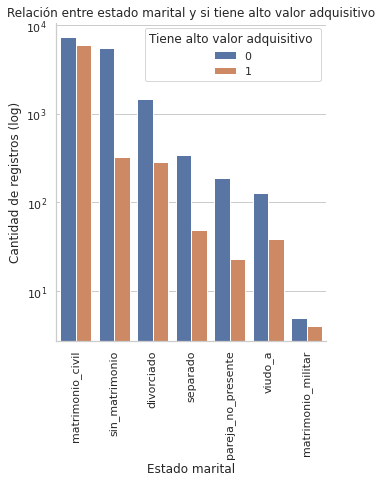

In [ ]:
plt.figure(dpi=150)
df_aux = df_estado_marital_hombre[["tiene_alto_valor_adquisitivo", "estado_marital"]].value_counts().reset_index()
df_aux.columns.values[2] = 'count'

sbn.catplot(data=df_aux, x='estado_marital', y='count', hue='tiene_alto_valor_adquisitivo', kind='bar', legend=False)

plt.legend(title = "Tiene alto valor adquisitivo ")
plt.ylabel("Cantidad de registros (log)")
plt.xlabel("Estado marital")
plt.title('Relación entre estado marital y si tiene alto valor adquisitivo')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_estado_marital_mujer = pd.DataFrame()
df_estado_marital_mujer = df[df.genero == "mujer"].copy()

df_estado_marital_mujer["estado_marital"].value_counts()

sin_matrimonio        4767
divorciado            2672
matrimonio_civil      1657
viudo_a                825
separado               631
pareja_no_presente     205
matrimonio_militar      14
Name: estado_marital, dtype: int64

In [ ]:
plt.figure(dpi=150)
df_aux = df[["tiene_alto_valor_adquisitivo", "estado_marital"]].value_counts().reset_index()
df_aux.columns.values[2] = 'count'
df_aux.estado_marital.replace(to_replace=[True, False], value=["Sí", "No"], inplace=True)
df_aux.estado_marital.replace(to_replace=["sin_matrimonio", "viudo_a", "pareja_no_presente", "matrimonio_civil", "matrimonio_militar"], 
    value=["Sin matrimonio", "viudo/a", "Pareja no presente", "Matrimonio civil", "Matrimonio militar"], inplace=True)

sbn.catplot(data=df_aux, x='estado_marital', y='count', hue='tiene_alto_valor_adquisitivo', kind='bar', legend=False)

plt.legend(title = "Tiene alto valor adquisitivo ")
plt.ylabel("Cantidad de registros (log)")
plt.xlabel("Estado marital")
plt.title('Relación entre estado marital y si tiene alto valor adquisitivo')
plt.xticks(rotation=90)
plt.yscale("log")
plt.show()

<Figure size 960x720 with 0 Axes>

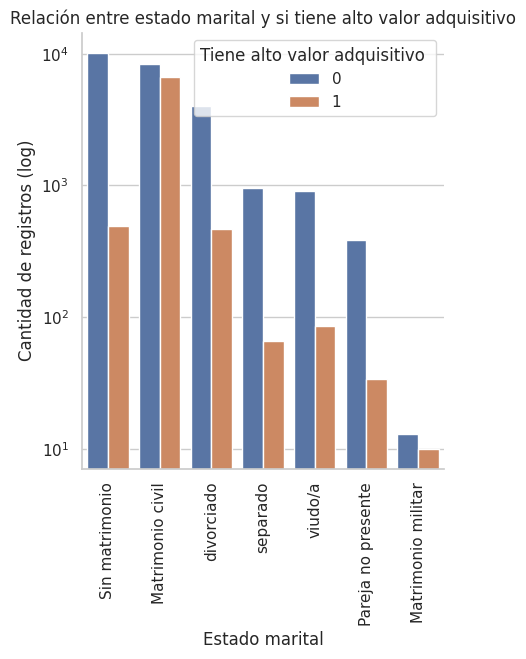

In [ ]:
# Comparamos la categoria de trabajo y si tiene alto valor adquisitivo
plt.figure(dpi=150)
df_aux = df[["tiene_alto_valor_adquisitivo", "estado_marital"]].value_counts().reset_index()
df_aux.columns.values[2] = 'count'
df_aux.estado_marital.replace(to_replace=[True, False], value=["Sí", "No"], inplace=True)
df_aux.estado_marital.replace(to_replace=["sin_matrimonio", "viudo_a", "pareja_no_presente", "matrimonio_civil", "matrimonio_militar"], 
    value=["Sin matrimonio", "viudo/a", "Pareja no presente", "Matrimonio civil", "Matrimonio militar"], inplace=True)

sbn.catplot(data=df_aux, x='estado_marital', y='count', hue='tiene_alto_valor_adquisitivo', kind='bar', legend=False)

plt.legend(title = "Tiene alto valor adquisitivo ")
plt.ylabel("Cantidad de registros (log)")
plt.xlabel("Estado marital")
plt.title('Relación entre estado marital y si tiene alto valor adquisitivo')
plt.xticks(rotation=90)
plt.yscale("log")
plt.show()

**Conclusiones**

Podemos observar que no tiene valores nulos.

Podemos observar que Pareja no presente tiene una baja probabilidad de tener alto nivel adquisitivo.

## **Ganancia, perdida declarada bolsa argentina**

**Preguntas:**

* ¿La columna aporta información relevante?
* ¿El dato esta completo en todas las filas?
* ¿Aporta valor para realizar una predicción?

**Análisis**

In [ ]:
# ¿Tiene valores nulos?
df["ganancia_perdida_declarada_bolsa_argentina"].isnull().sum()

0

In [ ]:
df["ganancia_perdida_declarada_bolsa_argentina"].value_counts()

 0        28330
 15024      347
 7688       284
 7298       246
-1902       202
          ...  
 22040        1
 2538         1
-2467         1
-2163         1
-2080         1
Name: ganancia_perdida_declarada_bolsa_argentina, Length: 210, dtype: int64

In [ ]:
df["opera_en_bolsa"] = df["ganancia_perdida_declarada_bolsa_argentina"].apply(lambda x: True if x != 0 else False)
df.drop(columns = "ganancia_perdida_declarada_bolsa_argentina", inplace = True)

In [ ]:
# Analizamos opera en bolsa vs Tiene alto valor adquisitivo 
df_no_opera_bolsa_argentina = df[df["opera_en_bolsa"] == False]
df_no_opera_bolsa_argentina["tiene_alto_valor_adquisitivo"].value_counts()

0    22939
1     5391
Name: tiene_alto_valor_adquisitivo, dtype: int64

In [ ]:
# Analizamos no opera en bolsa vs Tiene alto valor adquisitivo 
df_opera_bolsa_argentina = df[df["opera_en_bolsa"] == True]
df_opera_bolsa_argentina["tiene_alto_valor_adquisitivo"].value_counts()

1    2450
0    1781
Name: tiene_alto_valor_adquisitivo, dtype: int64

<Figure size 960x720 with 0 Axes>

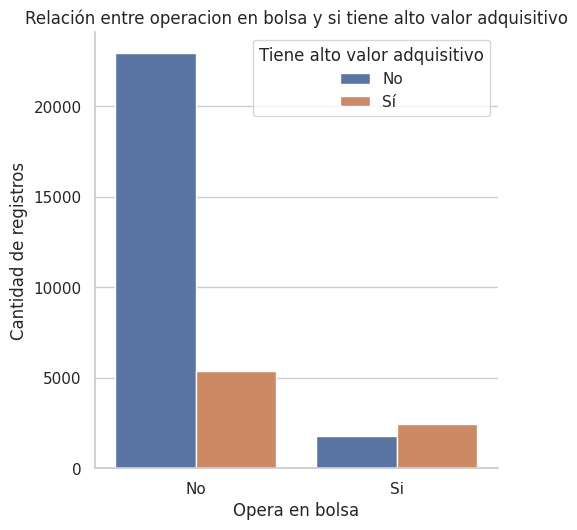

In [ ]:
# Comparamos el genero y si tiene alto valor adquisitivo
plt.figure(dpi=150)
df_aux = df[["tiene_alto_valor_adquisitivo", "opera_en_bolsa"]].value_counts().reset_index()
df_aux.columns.values[2] = 'count'
df_aux.tiene_alto_valor_adquisitivo.replace(to_replace=[True, False], value=["Sí", "No"], inplace=True)
df_aux.opera_en_bolsa.replace(to_replace=[False, True], value=["No", "Si"], inplace=True)

sbn.catplot(data=df_aux, x='opera_en_bolsa', y='count', hue='tiene_alto_valor_adquisitivo', kind='bar', legend=False)

plt.legend(title = "Tiene alto valor adquisitivo")
plt.ylabel("Cantidad de registros")
plt.xlabel("Opera en bolsa")
plt.title('Relación entre operacion en bolsa y si tiene alto valor adquisitivo')
plt.show()

**Conclusiones**

Podemos observar que no tiene valores nulos.

Creamos una variable booleana para determinar que operan o no en bolsa.

Tomamos los valores 0 como que no operan, pero también podria pasar que ganaron y perdieron lo mismo y por eso esten en 0.

Podemos observar que la mayoria de los que registraron una ganancia o perdida tienen alto nivel adquisitivo.

## **Genero**

**Preguntas:**

* ¿La columna aporta información relevante?
* ¿El dato esta completo en todas las filas?
* ¿Aporta valor para realizar una predicción?

**Análisis**

In [ ]:
# ¿Tiene valores nulos?
df["genero"].isnull().sum()

0

In [ ]:
df["genero"].value_counts()

hombre    21790
mujer     10771
Name: genero, dtype: int64

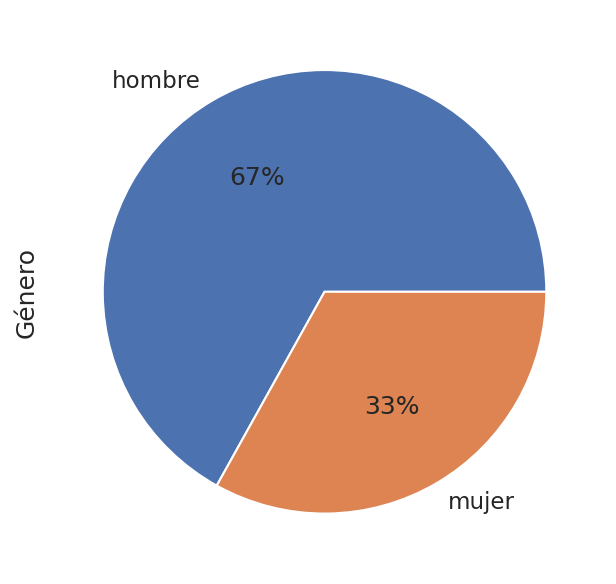

In [ ]:
# Vemos en porcentaje el género 
plt.figure(dpi=150)
df.genero.value_counts().plot(kind='pie', autopct='%1.0f%%', ylabel='Género')

In [ ]:
# Analizamos hombre vs Tiene alto valor adquisitivo 
df_genero_hombre = df[df["genero"] == "hombre"]
df_genero_hombre["tiene_alto_valor_adquisitivo"].value_counts()

0    15128
1     6662
Name: tiene_alto_valor_adquisitivo, dtype: int64

In [ ]:
# Analizamos mujer vs Tiene alto valor adquisitivo 
df_genero_mujer = df[df["genero"] == "mujer"]
df_genero_mujer["tiene_alto_valor_adquisitivo"].value_counts()

0    9592
1    1179
Name: tiene_alto_valor_adquisitivo, dtype: int64

<Figure size 960x720 with 0 Axes>

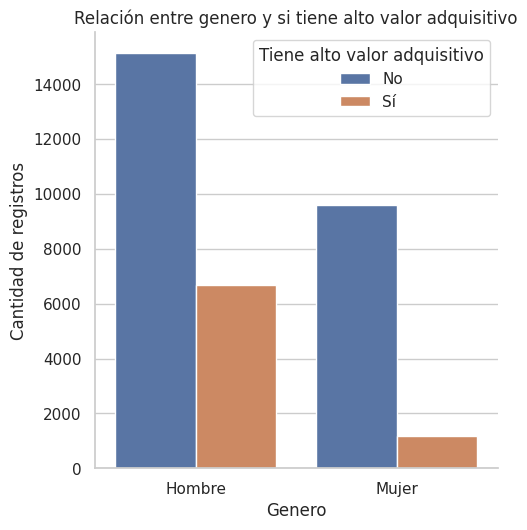

In [ ]:
# Comparamos el genero y si tiene alto valor adquisitivo
plt.figure(dpi=150)
df_aux = df[["tiene_alto_valor_adquisitivo", "genero"]].value_counts().reset_index()
df_aux.columns.values[2] = 'count'
df_aux.tiene_alto_valor_adquisitivo.replace(to_replace=[True, False], value=["Sí", "No"], inplace=True)
df_aux.genero.replace(to_replace=["hombre", "mujer"], value=["Hombre", "Mujer"], inplace=True)

sbn.catplot(data=df_aux, x='genero', y='count', hue='tiene_alto_valor_adquisitivo', kind='bar', legend=False)

plt.legend(title = "Tiene alto valor adquisitivo")
plt.ylabel("Cantidad de registros")
plt.xlabel("Genero")
plt.title('Relación entre genero y si tiene alto valor adquisitivo')
plt.show()

**Conclusiones**

Podemos observar que no tiene valores nulos y solo dos valores posibles.

Se observa que los registros correspondientes a mujeres tienden altamente a no tener alto valor adquisitivo.

El correspondiente a hombres no aporta informacion relevante ya que no se inclina por ninguna de las dos opciones, no es concluyente.


## **Horas de trabajo registradas**

**Preguntas:**

* ¿La columna aporta información relevante?
* ¿El dato esta completo en todas las filas?
* ¿Aporta valor para realizar una predicción?

**Análisis**

In [ ]:
# ¿Tiene valores nulos?
df["horas_trabajo_registradas"].isnull().sum()

0

In [ ]:
df["horas_trabajo_registradas"].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: horas_trabajo_registradas, Length: 94, dtype: int64

In [ ]:
df_horas_trabajadas = df[df["tiene_alto_valor_adquisitivo"] == True]
df_horas_trabajadas["horas_trabajo_registradas"].value_counts()

40    3247
50    1276
45     685
60     648
55     323
      ... 
95       1
29       1
17       1
96       1
73       1
Name: horas_trabajo_registradas, Length: 80, dtype: int64

In [ ]:
df_horas_trabajadas = df[df["tiene_alto_valor_adquisitivo"] == False]
df_horas_trabajadas["horas_trabajo_registradas"].value_counts()

40    11970
50     1543
20     1146
45     1139
35     1102
      ...  
87        1
73        1
89        1
74        1
95        1
Name: horas_trabajo_registradas, Length: 93, dtype: int64

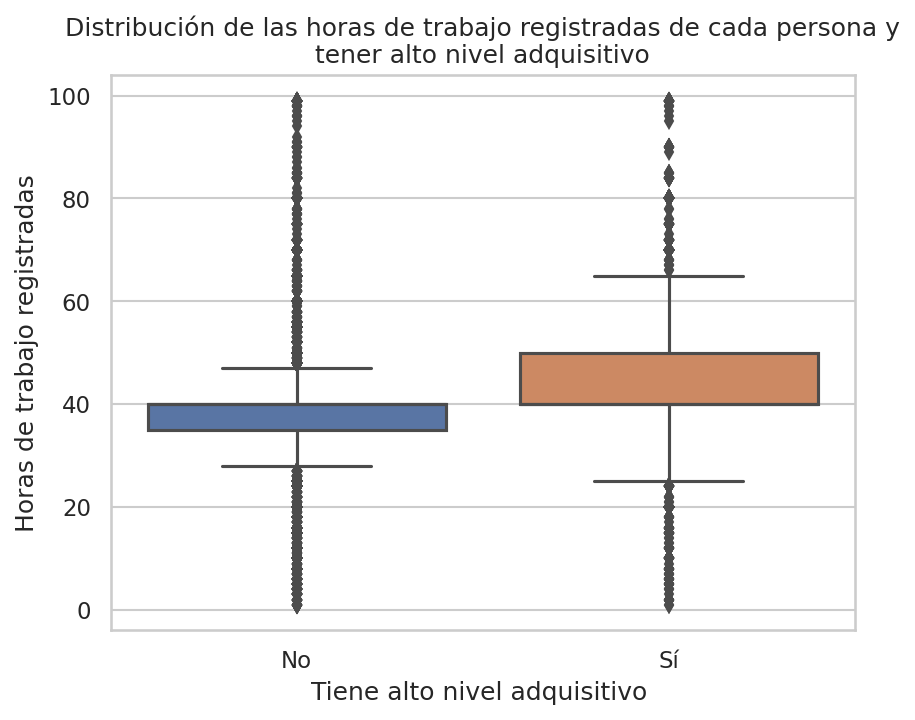

In [ ]:
plt.figure(dpi=150)
plt.title("Distribución de las horas de trabajo registradas de cada persona y\n tener alto nivel adquisitivo ")
sbn.boxplot(
    data=df,
    y='horas_trabajo_registradas',
    x='tiene_alto_valor_adquisitivo'
)
plt.ylabel("Horas de trabajo registradas")
plt.xlabel("Tiene alto nivel adquisitivo ")
plt.xticks([False, True], ["No", "Sí"])
plt.show()

**Conclusiones**

Podemos observar que no tiene valores nulos. 

Hay una alta concentración de datos que se corresponden con 40 hs trabajadas.

La gran mayoria de las personas que trabajan 40 hs tiene un nivel adquisitivo bajo pero fuera de eso los demas valores son muy parecidos en ambos casos no aportan información relevante.


## **Religion**

**Preguntas:**

* ¿La columna aporta información relevante?
* ¿El dato esta completo en todas las filas?
* ¿Aporta valor para realizar una predicción?
* ¿Los datos estan balanceados?

**Análisis**

In [ ]:
# ¿Tiene valores nulos?
df["religion"].isnull().sum()

0

In [ ]:
df["religion"].value_counts()

cristianismo    27816
judaismo         3124
budismo          1039
ateismo           311
otro              271
Name: religion, dtype: int64

In [ ]:
# Analizamos cristianismo vs Tiene alto valor adquisitivo 
df_cristianismo = df[df["religion"] == "cristianismo"]
df_cristianismo["tiene_alto_valor_adquisitivo"].value_counts()

0    20699
1     7117
Name: tiene_alto_valor_adquisitivo, dtype: int64

In [ ]:
# Analizamos judaismo vs Tiene alto valor adquisitivo 
df_judaismo = df[df["religion"] == "judaismo"]
df_judaismo["tiene_alto_valor_adquisitivo"].value_counts()

0    2737
1     387
Name: tiene_alto_valor_adquisitivo, dtype: int64

In [ ]:
# Analizamos budismo vs Tiene alto valor adquisitivo 
df_budismo = df[df["religion"] == "budismo"]
df_budismo["tiene_alto_valor_adquisitivo"].value_counts()

0    763
1    276
Name: tiene_alto_valor_adquisitivo, dtype: int64

In [ ]:
# Analizamos ateismo vs Tiene alto valor adquisitivo 
df_ateismo = df[df["religion"] == "ateismo"]
df_ateismo["tiene_alto_valor_adquisitivo"].value_counts()

0    275
1     36
Name: tiene_alto_valor_adquisitivo, dtype: int64

In [ ]:
# Analizamos otro vs Tiene alto valor adquisitivo 
df_otro = df[df["religion"] == "otro"]
df_otro["tiene_alto_valor_adquisitivo"].value_counts()

0    246
1     25
Name: tiene_alto_valor_adquisitivo, dtype: int64

<Figure size 960x720 with 0 Axes>

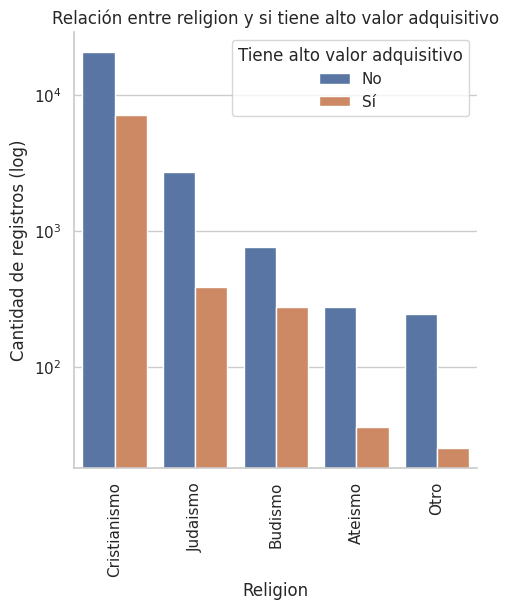

In [ ]:
# Comparamos religion y si tiene alto valor adquisitivo
plt.figure(dpi=150)
df_aux = df[["tiene_alto_valor_adquisitivo", "religion"]].value_counts().reset_index()
df_aux.columns.values[2] = 'count'
df_aux.tiene_alto_valor_adquisitivo.replace(to_replace=[True, False], value=["Sí", "No"], inplace=True)
df_aux.religion.replace(to_replace=["cristianismo", "judaismo", "budismo", "ateismo", "otro"], value=["Cristianismo", "Judaismo", "Budismo", "Ateismo", "Otro"], inplace=True)

sbn.catplot(data=df_aux, x='religion', y='count', hue='tiene_alto_valor_adquisitivo', kind='bar', legend=False)

plt.legend(title = "Tiene alto valor adquisitivo")
plt.ylabel("Cantidad de registros (log)")
plt.xlabel("Religion")
plt.title('Relación entre religion y si tiene alto valor adquisitivo')
plt.xticks(rotation=90)
plt.yscale("log")
plt.show()

**Conclusiones**

Podemos observar que no tiene valores nulos. 

La columna no esta balanceada, el valor cristianismo supera ampliamente a los demas como el caso del barrio Palermo.

No hay informacion concluyente que nos permita determinar solo viendo esta columna si la persona posee o no un alto nivel adquisitivo.

## **Rol familiar registrado**

**Preguntas:**

* ¿La columna aporta información relevante?
* ¿El dato esta completo en todas las filas?
* ¿Aporta valor para realizar una predicción?

**Análisis**

In [ ]:
# ¿Tiene valores nulos?
df["rol_familiar_registrado"].isnull().sum()

0

In [ ]:
df["rol_familiar_registrado"].value_counts()

casado         13193
sin_familia     8305
con_hijos       5068
soltero_a       3446
casada          1568
otro             981
Name: rol_familiar_registrado, dtype: int64

In [ ]:
df_rol_familiar_hombre = pd.DataFrame()
df_rol_familiar_hombre = df[df.genero == "hombre"].copy()

df_rol_familiar_hombre["rol_familiar_registrado"].value_counts()

casado         13192
sin_familia     4430
con_hijos       2823
soltero_a        792
otro             551
casada             2
Name: rol_familiar_registrado, dtype: int64

In [ ]:
df_rol_familiar_mujer = pd.DataFrame()
df_rol_familiar_mujer = df[df.genero == "mujer"].copy()

df_rol_familiar_mujer["rol_familiar_registrado"].value_counts()

sin_familia    3875
soltero_a      2654
con_hijos      2245
casada         1566
otro            430
casado            1
Name: rol_familiar_registrado, dtype: int64

<Figure size 960x720 with 0 Axes>

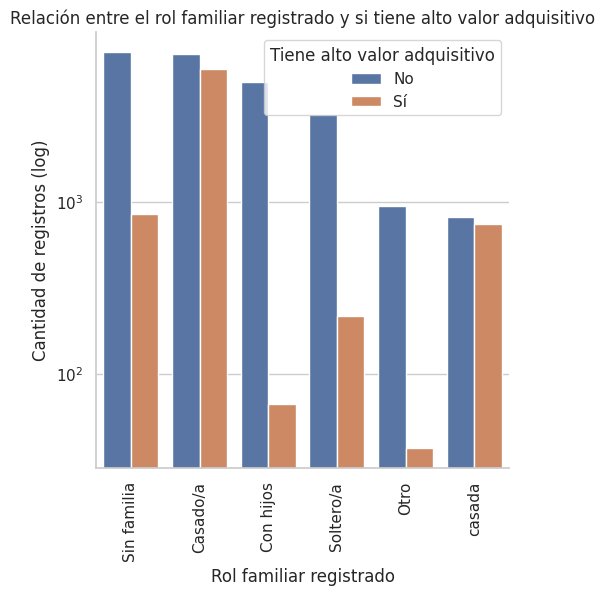

In [ ]:
# Comparamos la categoria de trabajo y si tiene alto valor adquisitivo
plt.figure(dpi=150)
df_aux = df[["tiene_alto_valor_adquisitivo", "rol_familiar_registrado"]].value_counts().reset_index()
df_aux.columns.values[2] = 'count'
df_aux.tiene_alto_valor_adquisitivo.replace(to_replace=[True, False], value=["Sí", "No"], inplace=True)
df_aux.rol_familiar_registrado.replace(to_replace=["casado", "sin_familia", "con_hijos", "soltero_a", "otro"],  value=["Casado/a", "Sin familia", "Con hijos", "Soltero/a", "Otro"], inplace=True)

sbn.catplot(data=df_aux, x='rol_familiar_registrado', y='count', hue='tiene_alto_valor_adquisitivo', kind='bar', legend=False)

plt.legend(title = "Tiene alto valor adquisitivo")
plt.ylabel("Cantidad de registros (log)")
plt.xlabel("Rol familiar registrado")
plt.title('Relación entre el rol familiar registrado y si tiene alto valor adquisitivo')
plt.xticks(rotation=90)
plt.yscale("log")
plt.show()

**Conclusiones**

Podemos observar que no tiene valores nulos. 

Se puede observar una clara tendencia a no tener un alto valor adquisitivo si la persona posee el rol Otro o Con hijos.

Quizas se pueda usar como complemento para realizar una prediccion si tenemos en cuenta la tendencia descripta anteriormente.

Como curiosidad observamos que entre los datos de hombres hay dos valores "casada" y entre las mujeres un dato "casado".

## **Trabajo**

**Preguntas:**

* ¿La columna aporta información relevante?
* ¿El dato esta completo en todas las filas?
* ¿Aporta valor para realizar una predicción?
* ¿Los datos estan balanceados?

**Análisis**

In [ ]:
# ¿Tiene valores nulos?
df["trabajo"].isnull().sum()

1843

In [ ]:
df["trabajo"].value_counts()

profesional_especializado    4140
reparador                    4099
directivo_gerente            4066
entretenimiento              3770
ventas                       3650
otros                        3295
inspector                    2002
transporte                   1597
limpiador                    1370
sector_primario               994
soporte_tecnico               928
seguridad                     649
servicio_domestico            149
ejercito                        9
Name: trabajo, dtype: int64

<Figure size 960x720 with 0 Axes>

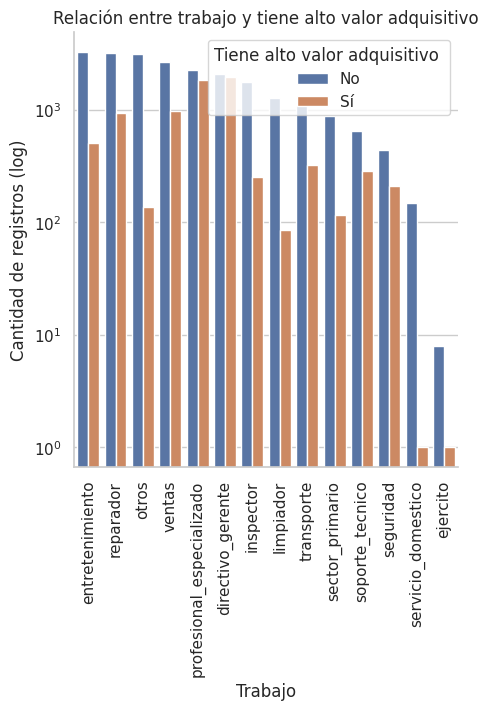

In [ ]:
# Comparamos trabajo y tiene alto valor adquisitivo
plt.figure(dpi=150)
df_aux = df[["tiene_alto_valor_adquisitivo", "trabajo"]].value_counts().reset_index()
df_aux.columns.values[2] = 'count'
df_aux.tiene_alto_valor_adquisitivo.replace(to_replace=[True, False], value=["Sí", "No"], inplace=True)

sbn.catplot(data=df_aux, x='trabajo', y='count', hue='tiene_alto_valor_adquisitivo', kind='bar', legend=False)

plt.legend(title = "Tiene alto valor adquisitivo ")
plt.ylabel("Cantidad de registros (log)")
plt.xlabel("Trabajo")
plt.title('Relación entre trabajo y tiene alto valor adquisitivo')
plt.xticks(rotation=90)
plt.yscale("log")
plt.show()

**Conclusiones**

Podemos observar que esta columna tiene un faltante de 1843 del total de valores (5,7 %). (Hay unos valores pocos representativos)

Los datos se encuentran bastante balanceados, no hay alguno que concentre la mayoria de los registros.

Luego se observa que el trabajo Servicio Domestico tiene una clara tendencia a no tener un alto nivel adquisitivo y de la misma forma pero un poco menos el Ejercito.

Fuera de esto los demas datos no son concluyentes para basarnos solo en ellos a la hora de realizar la prediccion.

# **Relación entre columnas**

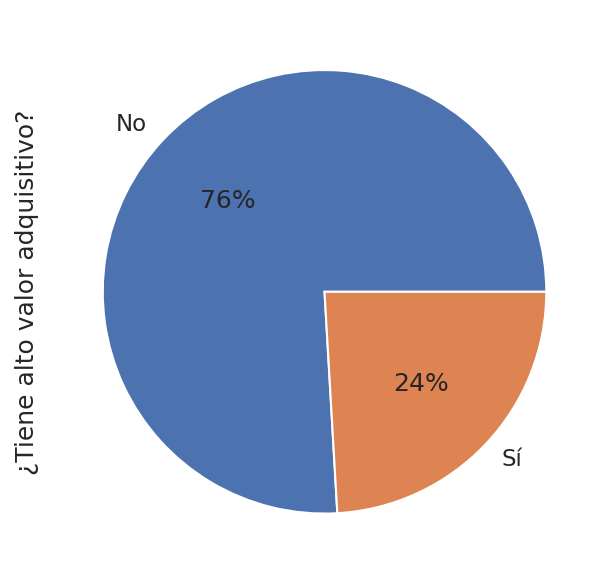

In [ ]:
# Vemos en porcentaje cantidad de nivel adquisitivo alto 
plt.figure(dpi=150)
df.tiene_alto_valor_adquisitivo.replace(to_replace=[True, False], value=["Sí", "No"]).value_counts().plot(kind='pie', autopct='%1.0f%%', ylabel='¿Tiene alto valor adquisitivo?')


In [ ]:
new_df_alto_nivel = pd.DataFrame()
new_df_alto_nivel = df[df.tiene_alto_valor_adquisitivo == 1].copy()

Aqui podemos observar que la enorme mayoria de datos del set corresponden al target 0 (no tiene alto poder adquisitivo), lo que hace que si nuestro primer algoritmo solo devuelve como resultado un 0 estariamos en un 76% de presicion, lo cual elimina la opcion de medir la  efectividad del mismo a la hora de predecir solo teniendo en cuenta el porcentaje de aciertos.
Esto nos lleva concentrarnos en la tarea de encontrar y predecir correctamente los 1 (tiene alto poder adquisitiv) del set.

# A continuacion veremos algunos graficos que nos ayudaran a ver como se relaciona el alto poder adquisitivo con otros features del set para ayudarnos a realizar las predicciones de los 1 que queremos encontrar

En primer lugar vamos a separar el set en dos partes usando los datos de la columna Genero que nos permite separar el set en dos partes independientes entre si, lo separaremos en un set con Hombres y otro con Mujeres.

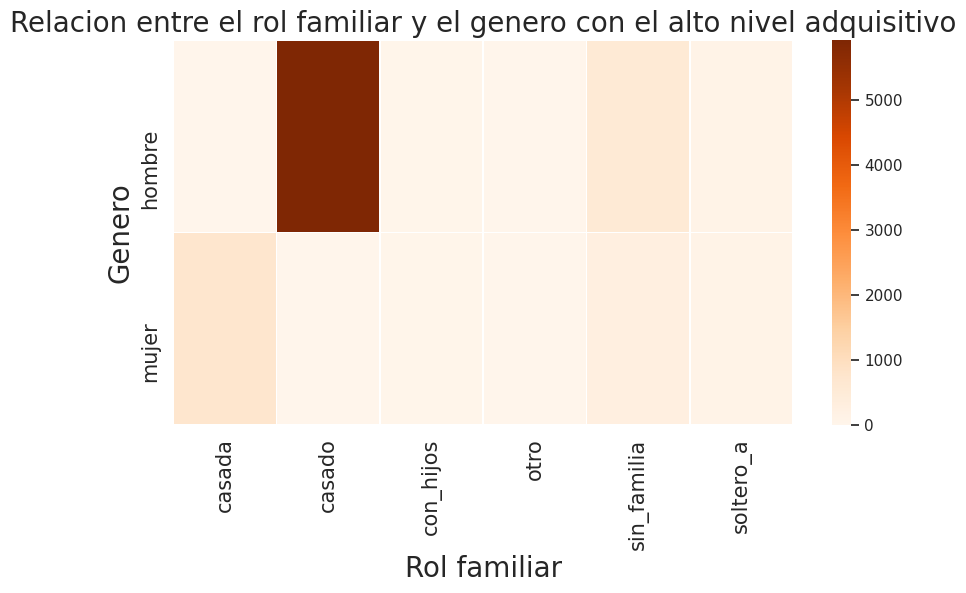

In [ ]:
df_alto_nivel_hombre = pd.DataFrame()

plt.figure(figsize = (10,5))
rol_genero = new_df_alto_nivel.groupby(['genero','rol_familiar_registrado']).size().unstack(fill_value=0)
rol_genero_heatMap = sbn.heatmap(rol_genero,vmin=0, cmap='Oranges', linewidths=0.5, annot_kws={"size": 15} )
rol_genero_heatMap.set_ylabel("Genero", fontsize = 20)
rol_genero_heatMap.set_xlabel("Rol familiar", fontsize = 20)
rol_genero_heatMap.set_title("Relacion entre el rol familiar y el genero con el alto nivel adquisitivo", fontsize = 20)
rol_genero_heatMap.tick_params(axis='both', labelsize=15)
rol_genero_heatMap.set_xticklabels(labels = rol_genero.columns.values, rotation=90);

**Conclusiones**

Aqui podemos ver que la mayoria de los 1 que queremos encontrar se concentran tanto en hombres como en mujeres en el rol familiar casado/a.

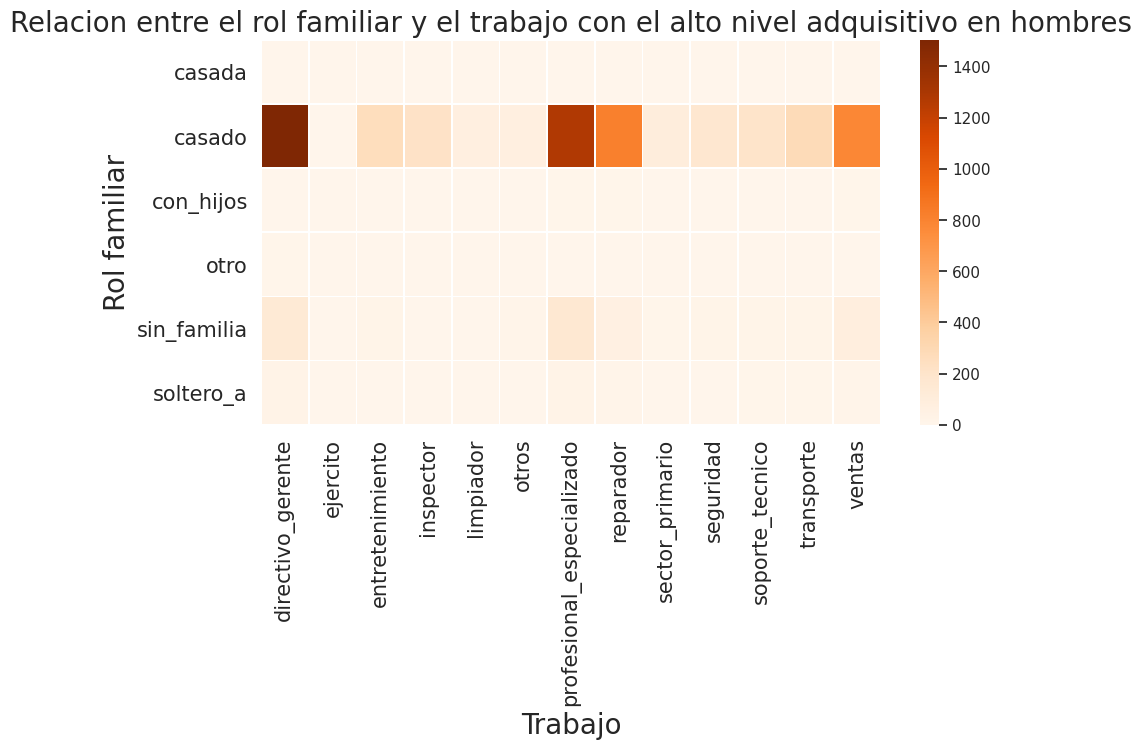

In [ ]:
df_alto_nivel_hombre = pd.DataFrame()
df_alto_nivel_hombre = new_df_alto_nivel[new_df_alto_nivel.genero == "hombre"].copy()

plt.figure(figsize = (10,5))
hombre_rol_trabajo = df_alto_nivel_hombre.groupby(['rol_familiar_registrado','trabajo']).size().unstack(fill_value=0)
hombre_rol_trabajo_heatMap = sbn.heatmap(hombre_rol_trabajo,vmin=0, cmap='Oranges', linewidths=0.5 )
hombre_rol_trabajo_heatMap.set_ylabel("Rol familiar", fontsize = 20)
hombre_rol_trabajo_heatMap.set_xlabel("Trabajo", fontsize = 20)
hombre_rol_trabajo_heatMap.set_title("Relacion entre el rol familiar y el trabajo con el alto nivel adquisitivo en hombres", fontsize = 20)
hombre_rol_trabajo_heatMap.tick_params(axis='both', labelsize=15)
hombre_rol_trabajo_heatMap.set_xticklabels(labels = hombre_rol_trabajo.columns.values, rotation=90);

**Conclusiones**

En este grafico observamos que teniendo en cuenta los features de "rol familiar" y "trabajo" la mayoria de los 1 se concentran en la interseccion de los trabajos "directivo_genrente", "profesional_especializado" con el rol familiar "casado".

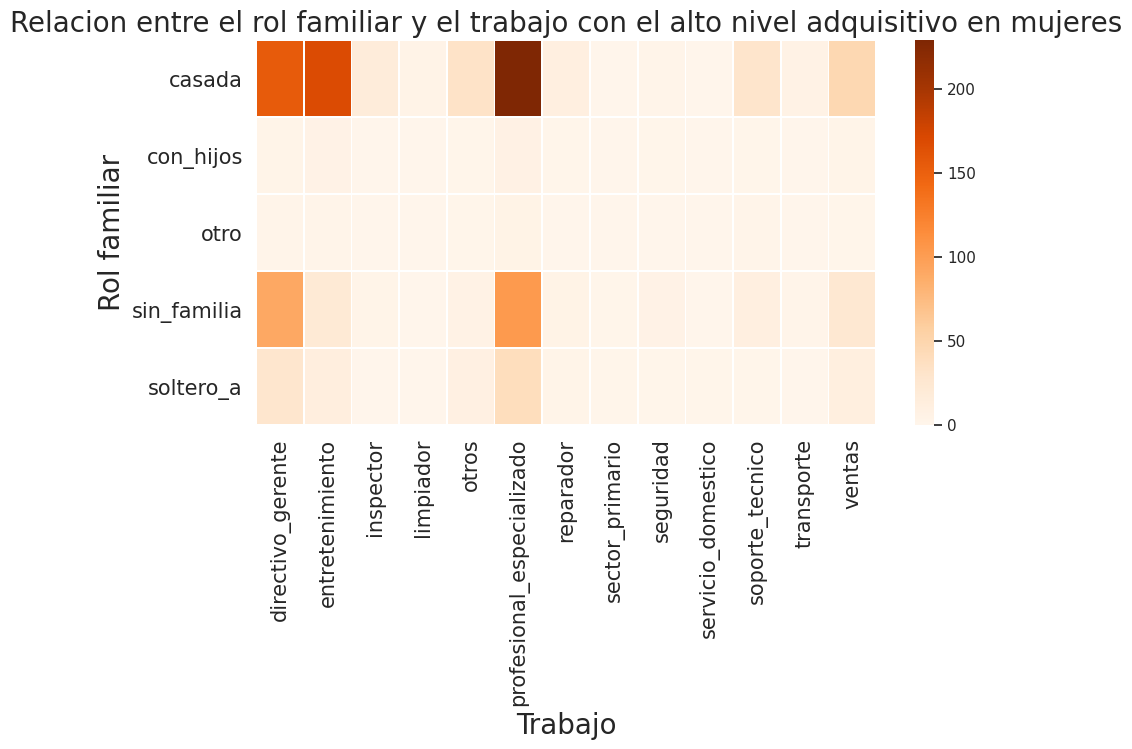

In [ ]:
df_alto_nivel_mujer = pd.DataFrame()
df_alto_nivel_mujer = new_df_alto_nivel[new_df_alto_nivel.genero == "mujer"].copy()

plt.figure(figsize = (10,5))
mujer_rol_trabajo = df_alto_nivel_mujer.groupby(['rol_familiar_registrado','trabajo']).size().unstack(fill_value=0)
mujer_rol_trabajo_heatMap = sbn.heatmap(mujer_rol_trabajo,vmin=0, cmap='Oranges', linewidths=0.5 )
mujer_rol_trabajo_heatMap.set_ylabel("Rol familiar", fontsize = 20)
mujer_rol_trabajo_heatMap.set_xlabel("Trabajo", fontsize = 20)
mujer_rol_trabajo_heatMap.set_title("Relacion entre el rol familiar y el trabajo con el alto nivel adquisitivo en mujeres", fontsize = 20)
mujer_rol_trabajo_heatMap.tick_params(axis='both', labelsize=15)
mujer_rol_trabajo_heatMap.set_xticklabels(labels = mujer_rol_trabajo.columns.values, rotation=90);

**Conclusiones**

En este graficos observamos que teniendo en cuenta los features de "rol familiar" y "trabajo" la mayoria de los 1 se concentran en las combinaciones de rol familiar "casada" con los trabajos "profesional_especializado", "entretenimiento" y "directivo_genrente".

# **Feature Engineering**

In [ ]:
def featureEngineering(df):
    
    df_clean = df.copy()

    df_clean["educacion_alcanzada"].replace({"preescolar" : 1, "1-4_grado": 2, "5-6_grado": 3, "7-8_grado" : 4, "9_grado" : 5, "1_anio" : 6, "2_anio" : 7, "3_anio" : 8, "4_anio" : 9, "5_anio" : 10, "universidad_1_anio" : 11, 
                      "universidad_2_anio" : 12, "universidad_3_anio" : 13, "universidad_4_anio" : 14, "universiada_5_anio" : 15, "universiada_6_anio" : 16}, inplace = True)
    
    df_clean["opera_en_bolsa"] = df_clean["ganancia_perdida_declarada_bolsa_argentina"].apply(lambda x: True if x != 0 else False)
    df_clean.drop(columns = "ganancia_perdida_declarada_bolsa_argentina", inplace = True)
    
    df_clean.head()
    return df_clean

In [ ]:
pred = []

def filter(row):
    if (row.genero == "hombre" and row.rol_familiar_registrado == "casado" and (row.trabajo == "profesional_especializado" or row.trabajo == "directivo_gerente")):
      pred.append(1)    
    elif (row.genero == "mujer" and row.rol_familiar_registrado == "casado" and (row.trabajo == "profesional_especializado" or row.trabajo == "directivo_gerente" or row.trabajo == "entretenimiento")):
      pred.append(1)                     
    else:
      pred.append(0)

def predict(df):
  df.apply(lambda row: filter(row), axis=1)

  return pred


In [ ]:
def baseline(df):
    entrada = featureEngineering(df)
    pred = predict(entrada)
    
    return pred

In [ ]:
# Generamos dataframe para probar
df_datos_test = getData()
df_datos_valor_adquisitivo = df_datos_test["tiene_alto_valor_adquisitivo"]

predicciones = baseline(df_datos_test)
accuracy_score(df_datos_valor_adquisitivo, predicciones)

0.807376923313166

# **Conclusión final**

Luego de analizar el set de datos podemos decir que el set en si esta muy desbalanceado en relacion a la variable target al punto de que el 76% del mismo corresponde al valor 0.

Esto hace que a la hora de predecir solamente haciendo que nuestro algoritmo devuelva un valor 0 estariamos en 76% de aciertos, lo cual elimina la opcion de medir mediante ese numero la precisión del modelo.

Luego nos encontramos que a la hora de encontrar los targets 1 ninguna de las columnas por si sola nos brindaba suficiente informacion por lo que se recurrio a la combinacion que se observa.

Partimos de los valores "Hombre" y "Mujer" como base porque asi podiamos dividir los registros en dos clases y, a nuestro parecer, hacer que las comparaciones fueran mejores.

Se planteo la opcion de unificar los valores del feature "rol_familiar" correspondientes a "casada" y "casado" en un valor generico "casado" ya que al dividir el set en los dos generos la perdida de informacion es insignificante en ambos (ver concuclucion del analisis de esta columna) pero al mismo tiempo por esto mismo de la division del set no ofreceria ninguna ventaja en la prediccion realizar el cambio asi que no se hizo.

Finalmente, luego de varias pruebas con muchas combinaciones de features, llegamos a nuestra mejor prediccion de 0.807%.
